In [334]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt


http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [358]:
degrees= UNITS.degrees

In [414]:
mkm= 1/1000

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3
mass_toast= 10
S_B_const= 5.67e-8
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 695770 *1000 *mkm
Pow_s= 3.9e26 
Q_b= .008/273 




num_G = G* mass_sun *mass_toast   

num_G


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

1327259700000.0

In [506]:

condition= Condition(x0= 0, y0= -1e14, velocity= .14, angle = 40*degrees, duration=5e8, T0= 0 )

In [507]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 1000)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition) 



In [508]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    Tangent_dir= Vector(-y, x)
    tan_dir= Tangent_dir.hat()
    w= V.proj(tan_dir) 
    xdir= -x/sqrt(x**2+y**2)
    ydir= -y/sqrt(x**2+y**2)
    
    
    wx= w.x
    wy= w.y
    
    

    F_grav= (G* mass_sun *mass_toast/ (sqrt(x**2+y**2)))  
    
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(wx, wy) * ((wx**2+wy**2) / (sqrt(x**2+y**2)))  
    #print(a_cent, a_grav)
    
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    a= Vector(ax, ay)

    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, ax, ay
    
    
    
slope_func(system.init,1,system)
    

(<Quantity(0.10724622203665693, 'dimensionless')>,
 <Quantity(0.0899902653561155, 'dimensionless')>,
 <Quantity(1.2335194639388569e-17, 'dimensionless')>,
 <Quantity(0.0013272597000000001, 'dimensionless')>)

In [509]:

run_odeint(system, slope_func)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [510]:
system.results.head

<bound method NDFrame.head of                           x              y             vx             vy
0.000000e+00   0.000000e+00  -1.000000e+14   1.072462e-01   8.999027e-02
5.005005e+05   5.367676e+04  -9.999983e+13   1.072460e-01   6.643845e+02
1.001001e+06   1.073533e+05  -9.999933e+13   1.072455e-01   1.328681e+03
1.501502e+06   1.610296e+05  -9.999850e+13   1.072446e-01   1.992982e+03
2.002002e+06   2.147052e+05  -9.999734e+13   1.072434e-01   2.657290e+03
2.502503e+06   2.683802e+05  -9.999584e+13   1.072418e-01   3.321607e+03
3.003003e+06   3.220543e+05  -9.999401e+13   1.072398e-01   3.985934e+03
3.503504e+06   3.757273e+05  -9.999185e+13   1.072375e-01   4.650275e+03
4.004004e+06   4.293991e+05  -9.998936e+13   1.072348e-01   5.314632e+03
4.504505e+06   4.830694e+05  -9.998653e+13   1.072318e-01   5.979006e+03
5.005005e+06   5.367381e+05  -9.998337e+13   1.072284e-01   6.643400e+03
5.505506e+06   5.904051e+05  -9.997988e+13   1.072246e-01   7.307816e+03
6.006006e+06   6.4407

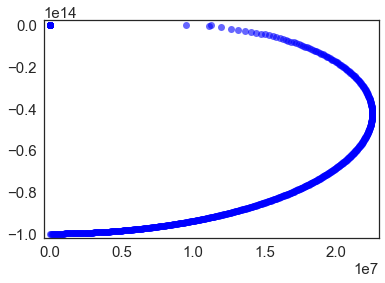

In [511]:
plot(system.results.x, system.results.y, "bo")
#plt.axis([-6e6, 6e6, -1.2e10, 1e10])

In [512]:
A= Vector(20, -10) 

B= Vector(0, 5)

A.proj(B)

C= 12*A.hat()

A.proj(B.hat())

<Quantity([ -0. -10.], 'dimensionless')>